<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Desafio_4_Squad_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafi o 3: Suplementos Alimentares**

Imagine que você trabalha em uma empresa que fabrica suplementos alimentares. O time de produtos quer entender qual das três novas fórmulas de proteína em pó proporciona maior ganho de massa muscular em atletas.

Foi realizada uma pesquisa com vários atletas e coletados os seguintes dados no arquivo desafi o_03_suplementos.csv

In [1]:
# Importando bibliotecas

#Dados
import pandas as pd
import numpy as np

#Visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Estatística
from scipy import stats



### **ETL**

1. Extração

In [2]:
#configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1Fhv43MTX13YkyMxDUBNzdmZmzpZbgH1b"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'


In [3]:
df = pd.read_csv(url)
df.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


In [6]:
# analisando o tamanho do dataset e os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    int64  
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


In [11]:
# convertendo id_atleta para string
df['id_atleta'] = df['id_atleta'].astype(str)


In [9]:
#Verificando características dos dados
df.describe()

,ganho_massa,idade,frequencia_treino
count,300.000000,300.000000,300.000000
mean,2.466733,28.123333,3.993333
std,1.436384,6.493742,1.430657
min,0.030000,18.000000,2.000000
25%,1.267500,22.000000,3.000000
50%,2.400000,28.000000,4.000000
75%,3.612500,34.000000,5.000000
max,4.980000,39.000000,6.000000


▶ Ganho de massa: não apresenta valores negativos, o que indica coerencia nos registros

▶ Frequencia de treino na semana também apresenta valores coerentes, sendo o máximo 6 vezes.

In [44]:
# Verificando escrita das do id produto para evitar contabilização incorreta
df['id_produto'].unique()

array(['Fórmula 3', 'Fórmula 1', 'Fórmula 2'], dtype=object)

<ipython-input-45-bb046a5acb74>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variável', y='Valor', data=df_melt, ax=axes[3], palette=custom_palette)


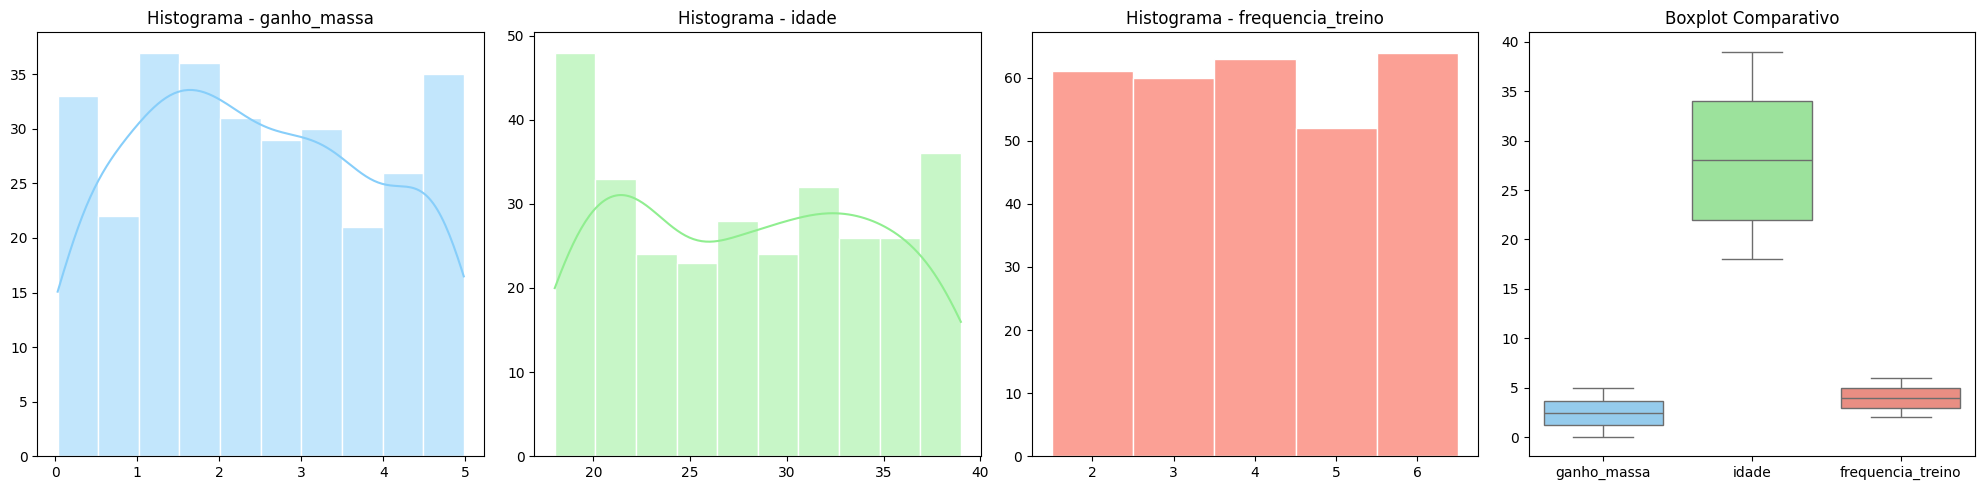

In [45]:
# Verificação de outliers

# Paleta personalizada
custom_palette = ['lightskyblue', 'lightgreen', 'salmon']

# Lista de variáveis numéricas
variaveis = ['ganho_massa', 'idade', 'frequencia_treino']

# Criação da figura com 1 linha e 4 colunas (3 histogramas + 1 boxplot)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Histogramas (colunas 0 a 2)
for i, var in enumerate(variaveis):
  if var == 'frequencia_treino':
    sns.histplot(df[var], ax=axes[i], discrete=True, color=custom_palette[i], edgecolor='white')
  else:
    sns.histplot(df[var], ax=axes[i], kde=True, color=custom_palette[i], edgecolor='white')
  axes[i].set_title(f'Histograma - {var}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

# Boxplot comparativo na última coluna (coluna 3)
df_melt = df[variaveis].melt(var_name='Variável', value_name='Valor')
sns.boxplot(x='Variável', y='Valor', data=df_melt, ax=axes[3], palette=custom_palette)
axes[3].set_title('Boxplot Comparativo')
axes[3].set_xlabel('')
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()


Através do boxplot e histogramas, não observamos a presenta de outliers nos dados para as principais categorias.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    object 
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


<ipython-input-59-ba9e62ed7d5c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='faixa_treino', y=var, data=df, palette=custom_palette, ax=axes[i])
<ipython-input-59-ba9e62ed7d5c>:19: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='faixa_treino', y=var, data=df, palette=custom_palette, ax=axes[i])
<ipython-input-59-ba9e62ed7d5c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='faixa_idade', y=var, data=df, palette=custom_palette, ax=axes[i])
<ipython-input-59-ba9e62ed7d5c>:22: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an u

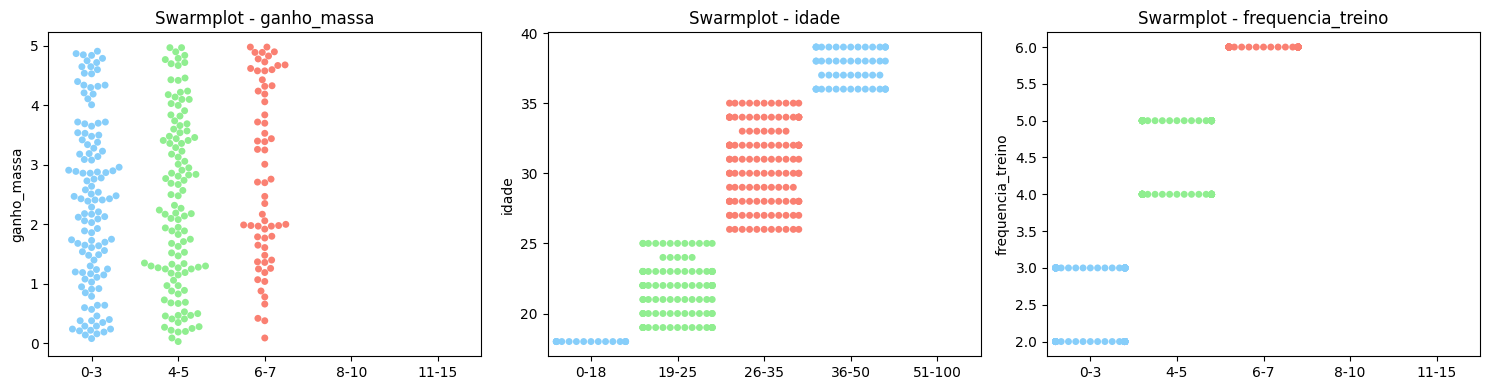

In [59]:

# Paleta personalizada
custom_palette = ['lightskyblue', 'lightgreen', 'salmon']

# Lista de variáveis numéricas
variaveis = ['ganho_massa', 'idade', 'frequencia_treino']

# Criar faixas de treino, idade ou o que você preferir
df['faixa_treino'] = pd.cut(df['frequencia_treino'], bins=[0, 3, 5, 7, 10, 15], labels=['0-3', '4-5', '6-7', '8-10', '11-15'])
df['faixa_idade'] = pd.cut(df['idade'], bins=[0, 18, 25, 35, 50, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-100'])

# Criação da figura com 1 linha e 3 colunas para os swarmplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Swarmplot para cada variável
for i, var in enumerate(variaveis):
    # Escolher a variável de divisão no eixo X, baseado na variável que você deseja analisar
    if var == 'ganho_massa':
        # Use the custom_palette directly instead of indexing it
        sns.swarmplot(x='faixa_treino', y=var, data=df, palette=custom_palette, ax=axes[i])
    elif var == 'idade':
        # Use the custom_palette directly instead of indexing it
        sns.swarmplot(x='faixa_idade', y=var, data=df, palette=custom_palette, ax=axes[i])
    else:
        # Use the custom_palette directly instead of indexing it
        sns.swarmplot(x='faixa_treino', y=var, data=df, palette=custom_palette, ax=axes[i])

    axes[i].set_title(f'Swarmplot - {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()